In [1]:
# some information retrieved from https://www.tensorflow.org/get_started/
# and wikipedia : TensorFlow https://en.wikipedia.org/wiki/TensorFlow

### What is Tensorflow?

"TensorFlow is a tool for machine learning. While it contains a wide range of functionality, TensorFlow is mainly designed for deep neural network models."

TensorFlow was developed by the Google Brain team for internal Google use. It was released under the Apache 2.0 open source license on November 9, 2015.

Google Brain: DistBelief 2011 - Tensorflow - TPU May 2016 - TensorFlow Lite for Android May 2017

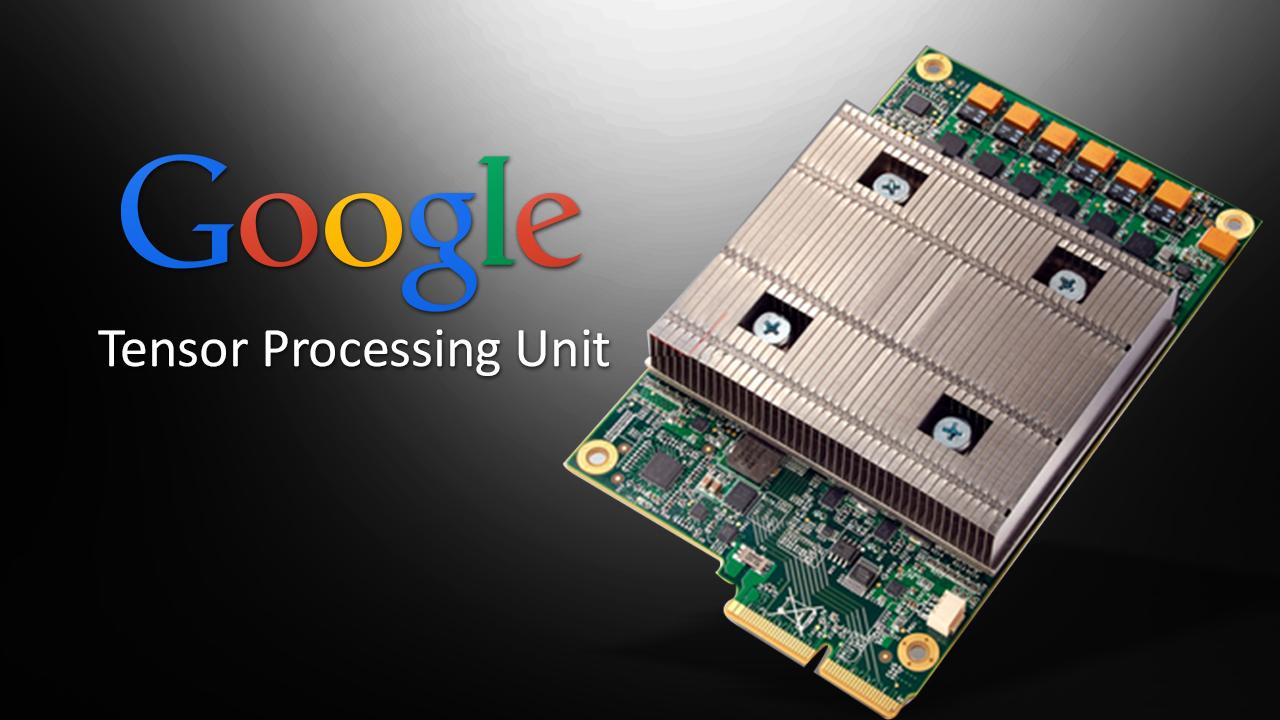

In [5]:
from IPython.display import Image
Image("./pic/google_tpu.jpg") 
# https://static.seekingalpha.com/uploads/2016/6/17/41095095-14661649183226545_origin.jpg

### High Level API built on Tensorflow

For example: Keras and  TFLearn  
Projects https://deepmind.com/blog/wavenet-generative-model-raw-audio/

### What is Tensor?

我们可以把 Tensor 想象成一个多维矩阵   n dimentional matrix  

### How things works in Tensorflow?

#### 1. Builting a graph

<img src="./graph_example.png">

In [6]:
# node operations  edges values

In [9]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
a=tf.constant(1,name="input_a")
b=tf.constant(2,name="input_b")

In [11]:
c=tf.multiply(a,b, name='mul_c')
d=tf.multiply(a,b, name='mul_d')

In [12]:
e=tf.add(c,d, name='add_e')

In [13]:
print(e)

Tensor("add_e_1:0", shape=(), dtype=int32)


#### 2. Running a graph

In [14]:
sess=tf.Session()

In [15]:
sess.run(e)

4

### Visualize using Tensor Board

In [16]:
writer=tf.summary.FileWriter('./jimmy',sess.graph)

### Close

In [17]:
writer.close()


In [16]:
tensorboard --logdir?

Object `logdir` not found.


In [ ]:
tensorboard --logdir

### Command line

In [ ]:
! tensorboard --logdir='./my_graph'

### More about Tensor?

#### 1. Tensor Shapes
#### 2. Tensor Operations
#### 3. Tensor Slicing
#### 4. Sequences

### More about Graph

In [3]:
# "A TensorFlow computation, represented as a dataflow graph".
# Official: https://www.tensorflow.org/versions/master/api_docs/python/tf/Graph

我们可以创建多个 graph （不推荐） 如果不写 operations 会存在于默认的 graph 里

In [5]:
import tensorflow as tf

new_graph= tf.Graph()

with new_graph.as_default():
    a=3
    b=2
    
    x=tf.add(a,b)

sess=tf.Session(graph=new_graph)
sess.run(x)

# with tf.Session() as sess:
#     sess.run(x)

5

### More about Session

In [ ]:
# Definition: "A class for running TensorFlow operations".
# Official: https://www.tensorflow.org/versions/master/api_docs/python/tf/Session

In [ ]:
a=tf.constant(1,name="input_a")
b=tf.constant(2,name="input_b")

c=tf.add(a,b, name='add_c')

sess=tf.Session(graph =tf.get_default_graph())
sess.run(c)

In [46]:
#sess.run(fetches, feed_dict=None, options=None, run_metadata=None)

fetches 可以接收 tensor 或者 Tensor Object   Tensor 返回 numpy array   Tensor Object 返回 none 

feed_dict 可以改写 tensor 的值 常用于给模型赋予 x,y 值

In [49]:
a=tf.constant(1,name="input_a")
b=tf.constant(2,name="input_b")

c=tf.add(a,b, name='add_c')

a_new = {a: 10}

sess=tf.Session(graph =tf.get_default_graph())
sess.run(c, feed_dict = a_new)

12

#### close

In [50]:
sess.close()

In [ ]:
#with tf.Session() as sess:
    #...
    # sess close automatically

### More about constant

tf.constant 会保存在 graph 里 所以如果 constant 很大的话 会增加 load graph 的速度

In [51]:
a= tf.constant([1,2], name ='constant_a')
print (tf.get_default_graph().as_graph_def())

node {
  name: "input_a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "input_b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "mul_c"
  op: "Mul"
  input: "input_a"
  input: "input_b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul_d"
  op: "Mul"
  input: "input_a"
  input: "input_b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "add_e"
  op: "Add"
  input: "mul_c"
  input: "mul_d"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "input_a_1"
  op: "Const"
  attr {
    key: "dtype"
   

### Variables

In [6]:
tf.Variable([2,1], name= 'var_0')

<tf.Variable 'var_0:0' shape=(2,) dtype=int32_ref>

In [7]:
random_variable= tf.Variable(tf.random_normal([2,2]), name= 'var_random')

In [10]:
tf.truncated_normal?

In [11]:
tf.zeros([3,2])
tf.ones([3,2])
tf.random_normal([3,2],mean =0.0,stddev=2.0)
tf.truncated_normal([3,2],mean =0.0,stddev=2.0)

<tf.Tensor 'truncated_normal:0' shape=(3, 2) dtype=float32>

#### Examples

生成一个随机 2 * 2 矩阵

In [57]:
random_variable= tf.Variable(tf.random_normal([2,2]), name= 'var_random')
init=tf.variables_initializer([random_variable], name= 'random_variable' )
sess= tf.Session()
sess.run(init)
sess.run(random_variable)

array([[ 0.20952266,  0.75634623],
       [-0.70633674,  0.50185984]], dtype=float32)

In [59]:
tf.Variable(trainable=True)

In [16]:
ones_variable=tf.Variable(tf.ones([2,3],name='var_ones'))
init=tf.variables_initializer([ones_variable],name='ones_variable')
sess=tf.Session()
sess.run(init)
sess.run(ones_variable)

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [18]:
sess.close()

### More about Placeholders

In [17]:
import tensorflow as tf
import numpy as np

In [8]:
tf.placeholder(dtype, shape=None, name=None)   #Required dtype

In [26]:
# Create a placeholder: dtype = tf.int32 shape = 5
a=tf.placeholder(tf.int32,shape=[5],name='input_a')

In [25]:
tf.reduce_prod?

In [24]:
a=tf.placeholder(tf.int32,shape=[2,3],name='input_a')
b=tf.reduce_prod(a,name='input_b')
c=tf.add(b,b,name='input_c')
sess=tf.Session(graph=tf.get_default_graph())
iput_d={a: np.array([[2,3,3],[1,2,1]])}
# sess.run(b,feed_dict=iput_d)
sess.run(a,feed_dict=iput_d)

array([[2, 3, 3],
       [1, 2, 1]])

In [11]:
b=tf.reduce_prod(a,name='input_b')

In [12]:
c=tf.add(b,b,name='input_c')

In [14]:
sess=tf.Session()

In [16]:
# Create a dictionary to fill the placeholder a
input_dict={a:  np.array([1,2,3,4,5])}

In [17]:
sess.run(c, feed_dict=input_dict)

240

In [27]:
sess.close()

### How to organize your graph?      name_scope

name_scope 对于 更加清晰的 Tensor Board 很有好处

In [2]:
import tensorflow as tf

with tf.name_scope("A"):
    
    a=tf.add(1,2, name='a')
    b=tf.multiply(2,4, name='b')

with tf.name_scope("B"):
    
    c=tf.add(2,2, name='c')
    d=tf.multiply(3,4, name='d')

with tf.name_scope("output"):
    e= tf.add(b,c)

sess=tf.Session()
sess.run(e)
writer=tf.summary.FileWriter('./name_scope_example',sess.graph)
writer.close()
sess.close()

In [ ]:
# ! tensorboard --logdir ='./name_scope_example'

### Example 1: Building and Running your first TF graph

在这个小例子里面 我们会学习到：

1）用name scope 去划分 graph
2）写summary 为了可视化
3）用sess 运行

### Example 2:  Logistic Regression with TF

### Example 3: Feed Forward NN

### Practice

### Example 4: use CNN for MNIST